In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
# Imports
from backtest_utils import TradingSimulator
import pickle

In [47]:
strategy_name = 'dumb_strategy'
TS = TradingSimulator(strategy_name)

NOTICE: self.strategy: Need to use strategy_vault to automatically load the strategy based on strategy name (need to basically do a dynamic import


In [48]:
# Dump New symbols into the stock_symbols.pkl
stock_symbols_pickle = 'stock_symbols.pkl'  # Name of the pickle file
symbols = []  # Example list of stock symbols
if len(symbols) > 0:
    TS.SAU.add_stock_symbols_to_pickle(symbols, stock_symbols_pickle)

In [49]:
# Load the data from 'stock_symbols.pkl' into a variable called 'symbols'
with open(stock_symbols_pickle, 'rb') as file:
    symbols = pickle.load(file)

In [50]:
stock_symbols_pickle = 'stock_symbols.pkl'  # Name of the pickle file
TS.SAU.update_stock_data(pickle_file=stock_symbols_pickle)

Updating data for LIFW...


[*********************100%%**********************]  1 of 1 completed

Data for LIFW updated in data\LIFW.csv.
Updating data for SRL...


[*********************100%%**********************]  1 of 1 completed

Data for SRL updated in data\SRL.csv.
Updating data for SLAMW...


[*********************100%%**********************]  1 of 1 completed

Data for SLAMW updated in data\SLAMW.csv.
Updating data for BFRI...


[*********************100%%**********************]  1 of 1 completed


KeyboardInterrupt: 

## BACKTEST

In [51]:
# Imports
from datetime import datetime

# Optional Imports
import numpy as np
import matplotlib.pyplot as plt

In [52]:
symbols = ['HDB', 'BIIB', 'BNTX', 'MRNA', 'CHTR', 'AWK', 'SNAP', 'TFC', 'ES', 'KDP', 'HSY', 'NEE', 'TTWO', 'EL', 'JD', 'BA', 'EQNR', 'HUM', 'NTR', 'WPM', 'WPM', 'WBA', 'SBAC', 'MMM', 'BTI', 'ILMN', 'WDS', 'ADM', 'PFE', 'ALNY', 'FNV', 'NEM', 'WBD']


In [23]:
from backtest_utils import TradingSimulator
TS = TradingSimulator(strategy_name)
start_date = '2018-01-01'
end_date = '2020-12-31'
start_date_dt = datetime.strptime(start_date, "%Y-%m-%d")
end_date_dt = datetime.strptime(end_date, "%Y-%m-%d")
rebalance_frequency = 15  # In days
# create a numpy array of numbers 15 days apart from 0 to 365
long_count = 10
short_count = 0
portfolio_starting_value = 110000
risk_pct = 0.1
reinvest_profits_bool = False
leverage_multiplier = 5.0

# Run the backtest
test = TS.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool, leverage_multiplier)

# cProfile the backtest
# import cProfile
# cProfile.run('TS.run_backtest(symbols, start_date_dt, end_date_dt, rebalance_frequency, long_count, short_count, portfolio_starting_value, risk_pct, reinvest_profits_bool)', sort='cumtime')



NOTICE: self.strategy: Need to use strategy_vault to automatically load the strategy based on strategy name (need to basically do a dynamic import


NameError: name 'leverage_multiplier' is not defined

In [65]:
strategy_profit = np.cumsum(test['backtest_profits'])[-1]
print(f"Strategy Profit: {strategy_profit}")

Strategy Profit: 338386.02940197015


In [66]:
benchmark_returns = TS.get_benchmark_returns(start_date_dt, end_date_dt, test['rebalance_periods'], portfolio_starting_value, benchmark_name='^IXIC')

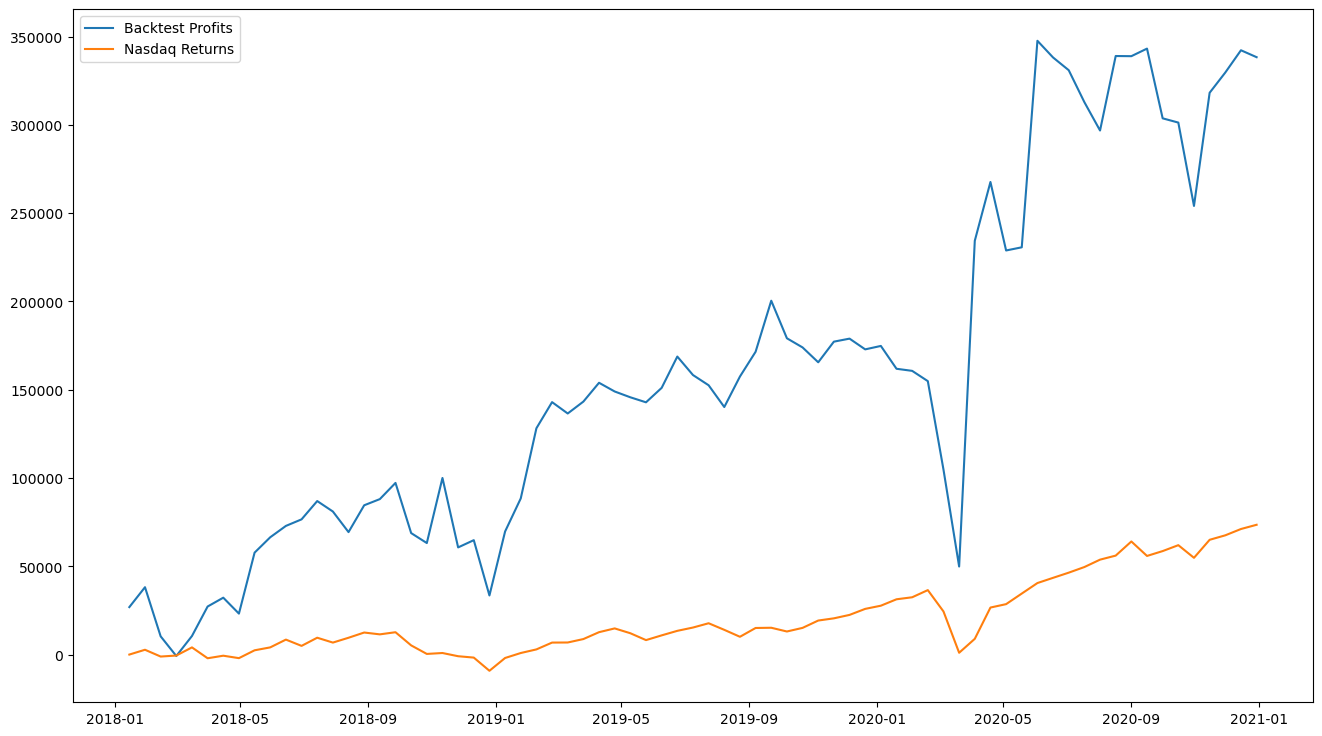

In [67]:
# Plot the backtest profits and the benchmark_data
plt.figure(figsize=(16, 9))
plt.plot(np.array(test['rebalance_periods'])[:, 1], np.cumsum(test['backtest_profits']), label='Backtest Profits')
plt.plot(np.array(test['rebalance_periods'])[:, 1], np.cumsum(benchmark_returns), label='Nasdaq Returns')
# Show labels
plt.legend()
# Show the plot
plt.show()

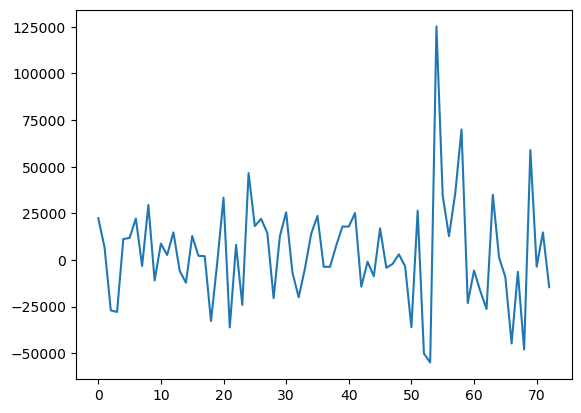

In [31]:
plt.plot(test['backtest_profits'])

# Verifying the backtest results

In [32]:
sum = 0
for count in range(11):
    profit = test['backtest_runs'][count][-1].astype(np.float64).sum()
    print({count: profit})
    sum += profit
print(sum)

{0: 22414.395053863504}
{1: 6865.966987609863}
{2: -27008.298545837402}
{3: -27816.20384120941}
{4: 11251.390266418457}
{5: 11837.74374961853}
{6: 22218.301918029734}
{7: -3220.568950653076}
{8: 29506.939260482926}
{9: -10923.657928466859}
{10: 8791.15885162355}
43917.16682147981


In [33]:
rebal_period = 100
test['backtest_runs'][rebal_period]

IndexError: list index out of range

In [34]:
asset_num = 0
asset_name = test['backtest_runs'][rebal_period][0][asset_num]
buy_price = float(test['backtest_runs'][rebal_period][1][asset_num])
qty = float(test['backtest_runs'][rebal_period][2][asset_num])
stop_loss = float(test['backtest_runs'][rebal_period][3][asset_num])
sell_price = float(test['backtest_runs'][rebal_period][4][asset_num])
stoploss_hit = test['backtest_runs'][rebal_period][5][asset_num]
profit = float(test['backtest_runs'][rebal_period][6][asset_num])
print(f'Asset: {asset_name}, Buy Price: {buy_price}, Qty: {qty}, Stop Loss: {stop_loss}, Sell Price: {sell_price}, stoploss_hit:{stoploss_hit}, Profit: {profit}')

IndexError: list index out of range

In [ ]:
verify_profit = (sell_price - buy_price) * qty
verify_profit

# ANALYSIS STUFF

In [ ]:
# Calculating Win % for Rebalance Periods

profit_count = 0
loss_count = 0
for backtest_run in backtest_runs:
    profit = backtest_run[-1]
    for output in profit:
        output = int(np.float32(output))
        if output > 0:
            profit_count += 1
        else:
            loss_count += 1
print({'profit_count': profit_count, 'loss_count': loss_count, 'profit_pct': profit_count/(profit_count+loss_count)})

In [ ]:
# calculate the sharp ratio
# https://www.youtube.com/watch?v=vTzjk6kLw2I

# IBKR Connection

In [ ]:
from ib_insync import IB, Stock
import nest_asyncio
nest_asyncio.apply()

In [ ]:
def connect_to_IBKR():
    '''NOTE: First start the TWS or Gateway software from IBKR'''
    
    # Create an instance of the IB class
    ib = IB()

    # Connect to the IBKR TWS (Trader Workstation) or Gateway
    ib.connect('127.0.0.1', 7496, clientId=0)

    # Check if the connection is successful
    if ib.isConnected():
        print('Connected to IBKR')
    else:
        print('Failed to connect to IBKR')
    return ib

In [ ]:
def get_current_portfolio(ib):
    # Request the current portfolio from IBKR
    portfolio = ib.portfolio()
    
    # Return the portfolio
    return portfolio


In [ ]:
def get_current_price(ib):
    # Request the current market data for AAPL
    contract = ib.qualifyContracts(Stock('AAPL', 'SMART', 'USD'))
    ticker = ib.reqTickers(contract)[0]
    
    # Get the current price
    current_price = ticker.marketPrice()
    
    # Return the current price
    return current_price


In [ ]:
get_current_price(ib)

In [ ]:
import pandas as pd
# load the csv file and put all the data in a pandas dataframe: path: 
nasdaq_screener_path = '/Users/vandanchopra/Downloads/nasdaq_screener_1709270654053.csv'
nasdaq_screener = pd.read_csv(nasdaq_screener_path)

In [ ]:
symbols_list = nasdaq_screener[nasdaq_screener['Industry'].isna()]['Symbol'].to_list()

In [ ]:
# from nasdaq_screener pandas df filter remove all symbols whose industry isna()
symbols_list_2 = nasdaq_screener.dropna(subset=['Industry'])['Symbol'].to_list()

